In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.segments import * 
from trajectory.planner import * 
from trajectory.plot import * 
from trajectory.trapmath import * 
from trajectory.profiles import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd
import numpy as np
from math import sqrt
from random import randint, random
from operator import attrgetter
from itertools import chain
pd.set_option('display.max_columns', None)

from copy import deepcopy

ag_ha = attrgetter(*'t v_0 v_c v_1 a_max'.split())
ag = attrgetter(*'x t v_0 v_c v_1 v_0_max v_1_max'.split())

def ch(v):
    for e in chain(*v):
        if e is not None:
            yield e
          

In [7]:
# Exhaustively test all combinations of velocities and velocity limits
# for init_parameters and update_boundary_velocities
%reload_ext autoreload
%autoreload 2
%run startup.py

a_max = 50_000
v_max = 5_000

velocities = [0,80,100,400,600,1000,2500,5000]
distances = [20,40,60,125,200,500,750,1000,5000]

errors = []
classes = []
params = []
profiles = []

for v_0, v_1 in product(velocities, velocities):
    for x in distances: 
        try:
            p = min_profile(x, v_0, v_1, v_max, a_max)
            profiles.append(p)
            x_ = hex_area_p(p)

            if round(x) != round(p.x):
                print( x_, (x, v_0, v_1, v_max, a_max), (p.x, p.v_0, p.v_1))
                n_errors += 1
        
        except ParameterError as e:
            errors.append(e)
            n_errors += 1

len(errors)


0

In [31]:
def calc_v_c(x, t, v_0, v_1, v_max, a_max):
    
    
    if v_0 == 0 and v_1 == 0:
    
        # should always be the lower root
        v_c = [a_max*t/2 - sqrt(a_max*(a_max*t**2 - 4*x))/2, a_max*t/2 + sqrt(a_max*(a_max*t**2 - 4*x))/2]

        vc = [e for e in v_c if e <= v_max and e >= 0]
    
    
        return v_c[0]
    
    
    v_h = max(v_0, v_1)
    
    if x >= v_h*t: # v_c must be above both v_0 and v_1, so it's a normal trap
        if v_0 == v_1:
            # substract off v_0, v_1 and the corresponding x and run again. 
            x_ = v_0*t
            v_c = calc_v_c(x-x_, t, 0, 0, v_max, a_max)
            return  v_c + v_0
        
    # Last resort, take the mean of v_0 and v_1
    v_m = (v_0+v_1)/2
    return calc_v_c(x, t, v_m, v_m, v_max, a_max)
        
        
ag = attrgetter(*'x t v_0 v_1 v_max a_max'.split()) 
    
others = []
for p in  profiles:
    if p.v_0 == p.v_1:
        assert p.v_c == round(calc_v_c(*ag(p))), ag(p)
    else:
        others.append(p)

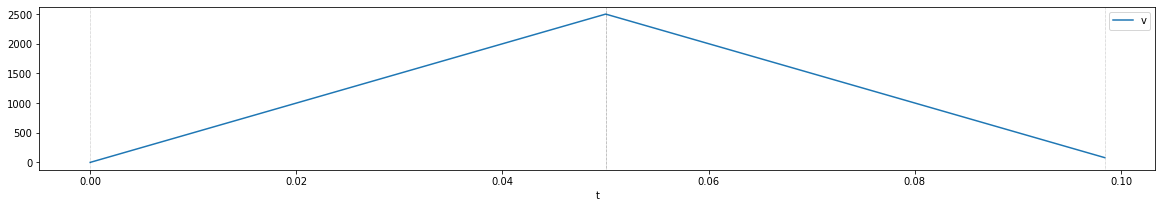

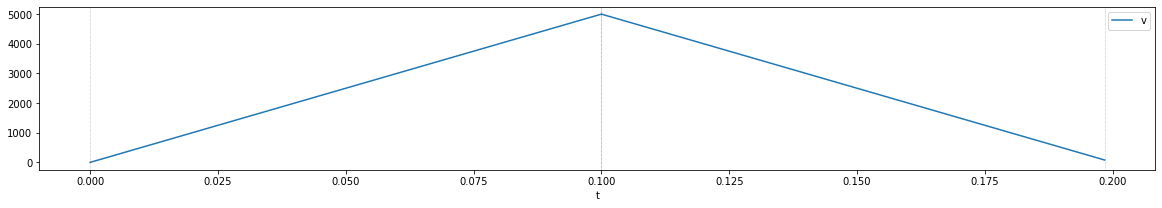

In [49]:
err = []
from random import choices
for p in others:
    if 
    e = calc_v_c(*ag(p)) - p.v_c
    err.append(e)
    if abs(e) > 20:
        plot_params(p)
        
    if len(err) > 5:
        break

In [45]:
pd.Series(err).describe()

count     448.000000
mean     -193.290379
std       303.194815
min     -1545.084972
25%      -248.056576
50%       -52.426318
75%        -9.137095
max        -0.002222
dtype: float64